In [1]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

2023-05-17 11:33:02.571198: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Put in the location of the video file that has to be processed
location_videofile = "/Volumes/Lea_COIN/jazaar_1min.mp4"

In [6]:
# Build the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [7]:
# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:25.00 fps, 1954 frames, 78.16 seconds
INFO:fer:Making directories at output

  5%|█▊                                   | 95/1954 [01:09<17:30,  1.77frames/s]


 10%|███▌                                | 192/1954 [02:08<15:58,  1.84frames/s]


 15%|█████▎                              | 289/1954 [03:06<25:44,  1.08frames/s]


 20%|███████                             | 386/1954 [04:09<15:34,  1.68frames/s]


 25%|████████▉                           | 483/1954 [05:09<12:57,  1.89frames/s]


 30%|██████████▋                         | 580/1954 [06:13<17:03,  1.34frames/s]


 35%|████████████▍                       | 677/1954 [07:09<12:21,  1.72frames/s]


 40%|██████████████▎                     | 774/1954 [08:04<08:32,  2.30frames/s]


 45%|████████████████                    | 871/1954 [08:56<08:20,  2.17frames/s]


 50%|█████████████████▊                  | 968/1954 [10:15<07:32,  2.18frames/s]


 55%|███████████████████                | 1065/1954 [11:22<06:48,  2.18frames/s]


 59%|████████████████████▊              | 1162/1954 [14:04<07:19,  1.80frames/s]


 64%|██████████████████████▌            | 1259/1954 [17:40<06:56,  1.67frames/s]


 69%|████████████████████████▎          | 1356/1954 [23:50<18:43,  1.88s/frames]


 74%|██████████████████████████         | 1453/1954 [29:40<08:49,  1.06s/frames]


 78%|███████████████████████████▏       | 1521/1954 [36:52<10:29,  1.45s/frames]
INFO:fer:Completed analysis: saved to output/jazaar_1min_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 2%
INFO:fer:Compressing: 5%
INFO:fer:Compressing: 7%
INFO:fer:Compressing: 10%
INFO:fer:Compressing: 13%
INFO:fer:Compressing: 15%
INFO:fer:Compressing: 18%
INFO:fer:Compressing: 21%
INFO:fer:Compressing: 23%
INFO:fer:Compressing: 26%
INFO:fer:Compressing: 28%
INFO:fer:Compressing: 31%
INFO:fer:Compressing: 34%
INFO:fer:Compressing: 36%
INFO:fer:Compressing: 39%
INFO:fer:Compressing: 42%
INFO:fer:Compressing: 44%
INFO:fer:Compressing: 47%
INFO:fer:Compressing: 50%
INFO:fer:Compressing: 52%
INFO:fer:Compressing: 55%
INFO:fer:Compressing: 57%
INFO:fer:Compressing: 60%
INFO:fer:Compressing: 63%
INFO:fer:Compressing: 65%
INFO:fer:Compressing: 68%
INFO:fer:Compressing: 71%
INFO:fer:Compressing: 73%
INFO:fer:Compressing: 76%
INFO:fer:Compressing: 78%
INFO:fer:Compressing: 81%
INFO:fer:Compressing: 8

In [8]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

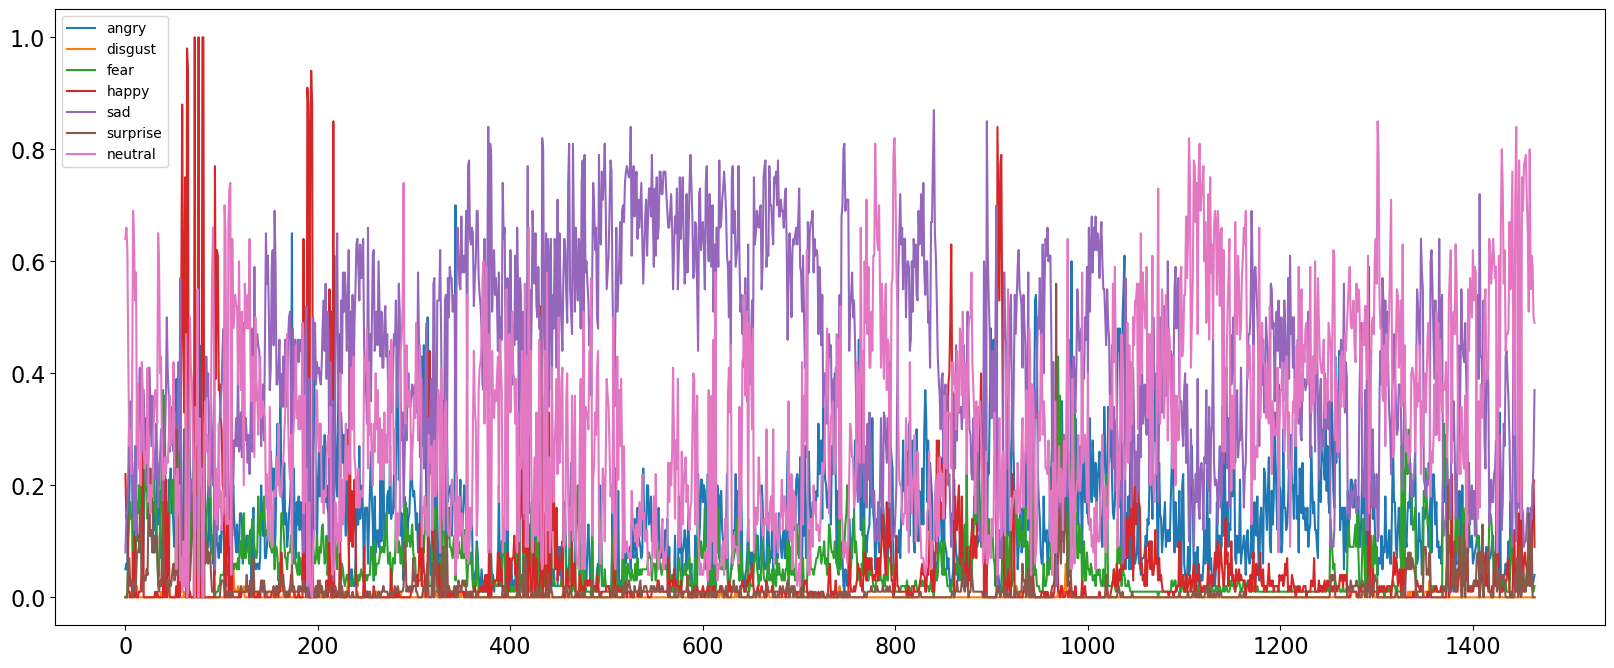

In [9]:
# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [10]:
# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

In [11]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

In [12]:
score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,202.25
1,Disgust,1.66
2,Fear,92.19
3,Happy,73.62
4,Sad,615.49
5,Surprise,21.88
6,Neutral,455.70
